In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 

In [2]:
data=pd.read_csv("ec2_network_in_5abac7.csv")

In [3]:
data

,timestamp,value
0,2014-03-01 17:36:00,42.0
1,2014-03-01 17:41:00,94.8
2,2014-03-01 17:46:00,42.0
3,2014-03-01 17:51:00,68.4
4,2014-03-01 17:56:00,68.4
...,...,...
4725,2014-03-18 03:21:00,42.0
4726,2014-03-18 03:26:00,42.0
4727,2014-03-18 03:31:00,118.5
4728,2014-03-18 03:36:00,75.0


In [4]:
data.head()#first five rows

,timestamp,value
0,2014-03-01 17:36:00,42.0
1,2014-03-01 17:41:00,94.8
2,2014-03-01 17:46:00,42.0
3,2014-03-01 17:51:00,68.4
4,2014-03-01 17:56:00,68.4


In [5]:
data.tail() #last five rows

,timestamp,value
4725,2014-03-18 03:21:00,42.0
4726,2014-03-18 03:26:00,42.0
4727,2014-03-18 03:31:00,118.5
4728,2014-03-18 03:36:00,75.0
4729,2014-03-18 03:41:00,75.0


In [6]:
data.sample(5) #random data used

,timestamp,value
3580,2014-03-14 03:56:00,112.8
1369,2014-03-06 11:41:00,68.4
137,2014-03-02 05:01:00,68.4
2248,2014-03-09 12:56:00,121.2
501,2014-03-03 11:21:00,68.4


In [7]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4730 non-null   object 
 1   value      4730 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.0+ KB


In [8]:
data.describe()
#here we get min ,max ,mean value

,value
count,4.730000e+03
mean,1.187146e+05
std,7.757187e+05
min,4.200000e+01
25%,4.200000e+01
50%,6.840000e+01
75%,1.080000e+02
max,8.285420e+06


In [9]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

In [10]:
# Basic checks

In [11]:
data.head()#first five rows

,timestamp,value
0,2014-03-01 17:36:00,42.0
1,2014-03-01 17:41:00,94.8
2,2014-03-01 17:46:00,42.0
3,2014-03-01 17:51:00,68.4
4,2014-03-01 17:56:00,68.4


In [12]:
data=pd.read_csv('ec2_network_in_5abac7.csv',parse_dates=[0],index_col='timestamp')

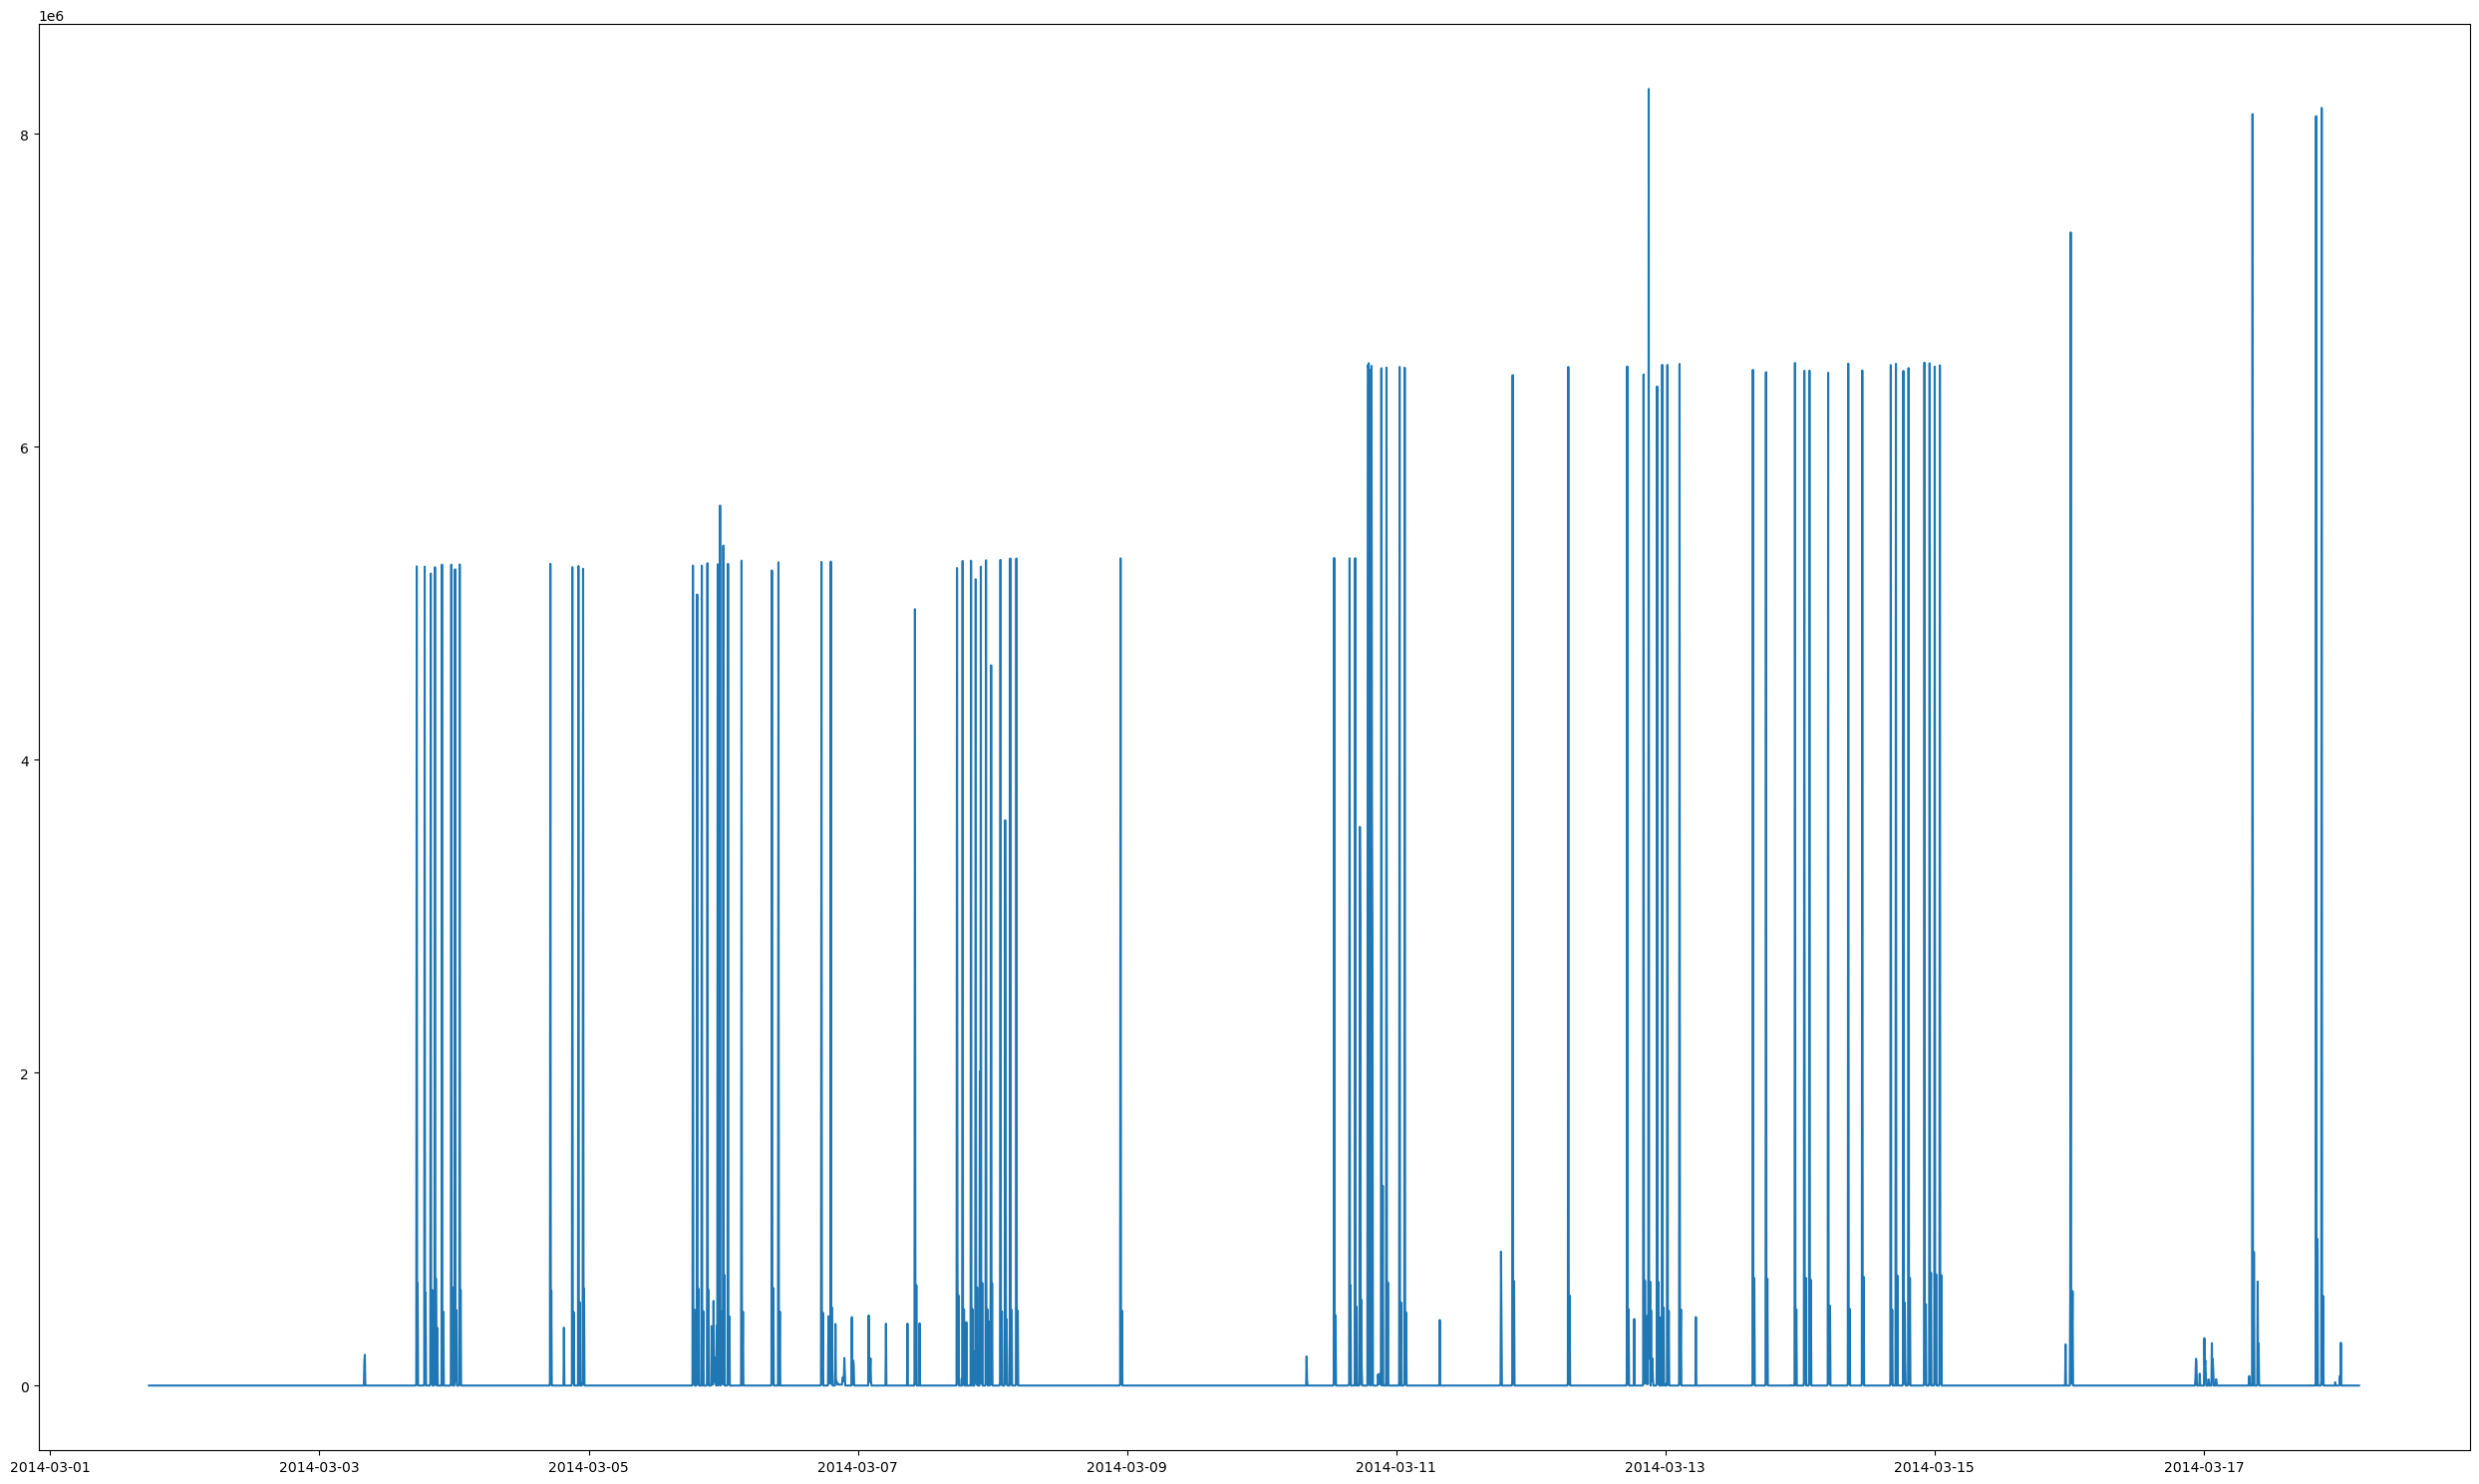

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

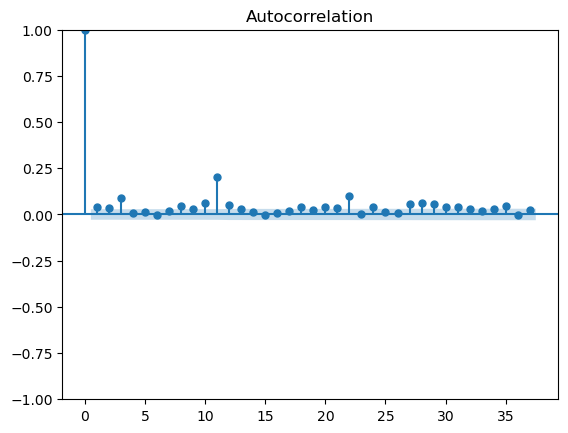

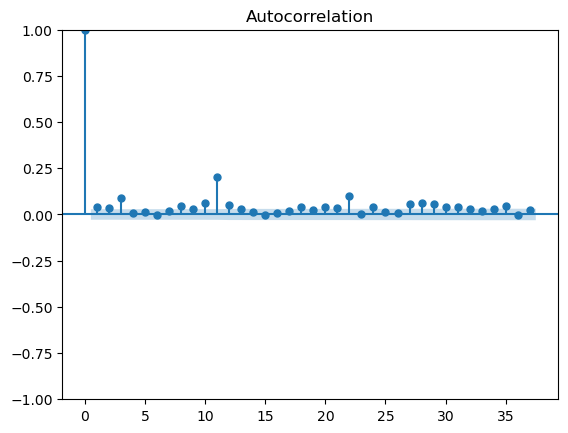

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [15]:
#We can perform the ADfuller test, a test based on hypothesis, where if the p-value is
#less than 0.05, then we can consider the time series is stationary, and if the P-value is
#greater than 0.05, then the time series is non-stationary.

In [16]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -8.36085289690832
2. P-Value :  2.8262880799865713e-13
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4701
5. Critical Values :
	 1% :  -3.4317418047913173
	 5% :  -2.862155018606945
	 10% :  -2.567097376628896


In [17]:
#P-value is higher for our dataset, and we can say that the evidence of rejecting the null
#hypothesis is low; hence the time series is non-stationary.

In [18]:
data

,value
timestamp,
2014-03-01 17:36:00,42.0
2014-03-01 17:41:00,94.8
2014-03-01 17:46:00,42.0
2014-03-01 17:51:00,68.4
2014-03-01 17:56:00,68.4
...,...
2014-03-18 03:21:00,42.0
2014-03-18 03:26:00,42.0
2014-03-18 03:31:00,118.5


In [19]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [20]:
data1

,value
timestamp,
2014-03-01 17:36:00,NaN
2014-03-01 17:41:00,52.8
2014-03-01 17:46:00,-52.8
2014-03-01 17:51:00,26.4
2014-03-01 17:56:00,0.0
...,...
2014-03-18 03:21:00,-99.0
2014-03-18 03:26:00,0.0
2014-03-18 03:31:00,76.5


In [21]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-03-01 17:41:00,52.8
2014-03-01 17:46:00,-52.8
2014-03-01 17:51:00,26.4
2014-03-01 17:56:00,0.0
2014-03-01 18:01:00,18.0
...,...
2014-03-18 03:21:00,-99.0
2014-03-18 03:26:00,0.0
2014-03-18 03:31:00,76.5


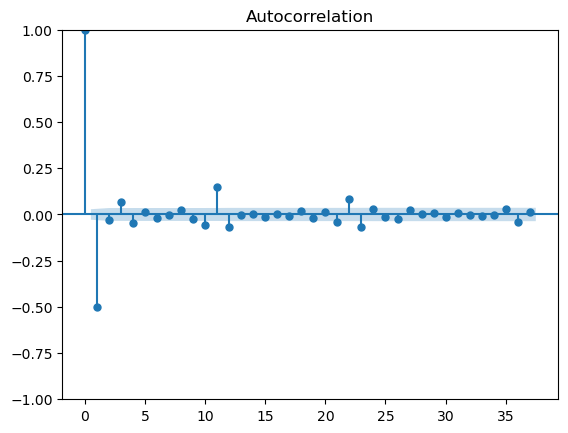

In [22]:
plot_acf(data1); # autocorrelation plot 

In [23]:
data2=data1.diff(periods=1) # differencing applied to data1

In [24]:
data2=data2.iloc[1:] # integrated to the order of 2/

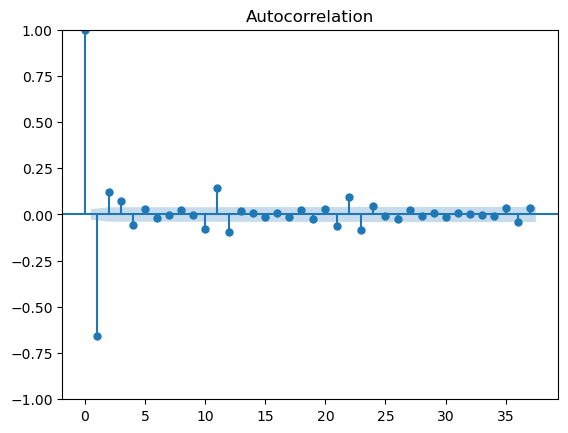

In [25]:
plot_acf(data2);

In [26]:
data2.shape#shape of the data rows and columns

(4728, 1)

In [27]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [28]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4628 entries, 2014-03-02 02:06:00 to 2014-03-18 03:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4628 non-null   float64
dtypes: float64(1)
memory usage: 72.3 KB


In [29]:
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [30]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [34]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

In [35]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

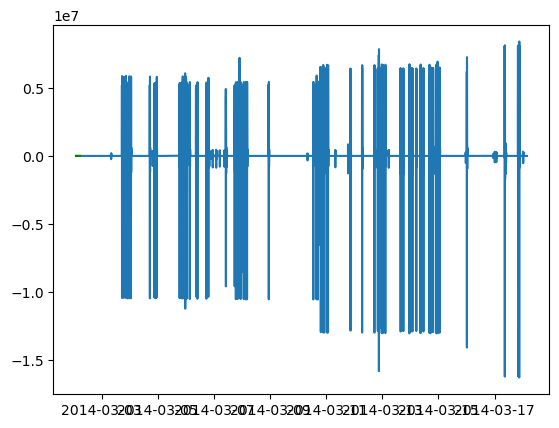

In [36]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [39]:
## evaluate the model
print(model_arima_fit.aic)

1192.8253540622143


In [40]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [41]:
prediction

2014-03-01 17:51:00   -103.785942
2014-03-01 17:56:00    -62.173798
2014-03-01 18:01:00     54.385028
2014-03-01 18:06:00    -15.966432
2014-03-01 18:11:00      5.310526
                          ...    
2014-03-02 05:16:00    -38.093699
2014-03-02 05:21:00    -38.099004
2014-03-02 05:26:00    -38.094945
2014-03-02 05:31:00    -38.098050
2014-03-02 05:36:00    -38.095675
Freq: 5T, Name: predicted_mean, Length: 142, dtype: float64

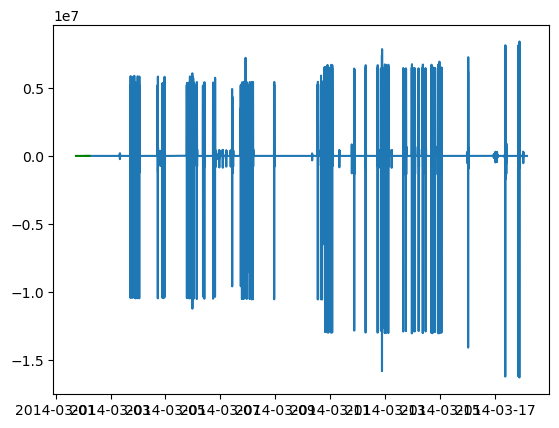

In [42]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [43]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [44]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) 1167.0491720942016
(0, 0, 1) 1055.643069642352
(0, 0, 2) 958.4003076064573
(0, 0, 3) 928.2952574768185
(0, 0, 4) 924.4226932646104
(0, 1, 0) 1274.221392940329
(0, 1, 1) 1161.0088031452174
(0, 1, 2) 1054.6066157540386
(0, 1, 3) 963.6766510828451
(0, 1, 4) 936.8605955414534
(0, 2, 0) 1383.476068190322
(0, 2, 1) 1268.8192147810441
(0, 2, 2) 1160.503862195028
(0, 2, 3) 1058.8587170071596
(0, 2, 4) 976.5397382796457
(0, 3, 0) 1492.7231224825427
(0, 3, 1) 1376.0936132862114
(0, 3, 2) 1266.27367682435
(0, 3, 3) 1162.424138504729
(0, 3, 4) 1067.4090836858684
(0, 4, 0) 1601.457404734098
(0, 4, 1) 1483.183949147551
(0, 4, 2) 1374.130359600294
(0, 4, 3) 1265.5528308819182
(0, 4, 4) 1168.2800212221282
(1, 0, 0) 1097.5015102596733
(1, 0, 1) 1002.2659277973584
(1, 0, 2) 933.3269898820121
(1, 0, 3) 972.1270315390396
(1, 0, 4) 929.772167644442
(1, 1, 0) 1192.8253540622143
(1, 1, 1) 1093.2579567139414
(1, 1, 2) 1003.0902585041781
(1, 1, 3) 942.7581576398198
(1, 1, 4) 966.0132436287014
(1, 2, 

LinAlgError: LU decomposition error.

In [45]:
min(list2)  # lowest aic score

12.0

In [46]:
loc=list2.index(min(list2))
loc

73

In [47]:
# pdq corresponding to lowest aic
list1[loc]

(2, 4, 3)

In [48]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [49]:
print(model_arima_fit.aic) # confirm aic score

894.2126248152689


In [50]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-03-02 02:06:00    91.299890
2014-03-02 02:11:00    -8.872675
2014-03-02 02:16:00   -11.029607
2014-03-02 02:21:00   -18.511100
2014-03-02 02:26:00    14.620340
2014-03-02 02:31:00    42.174940
2014-03-02 02:36:00   -76.131070
2014-03-02 02:41:00    30.114490
2014-03-02 02:46:00    43.969621
Freq: 5T, Name: predicted_mean, dtype: float64

In [51]:
prediction=model_arima_fit.predict(start=1,end=142)

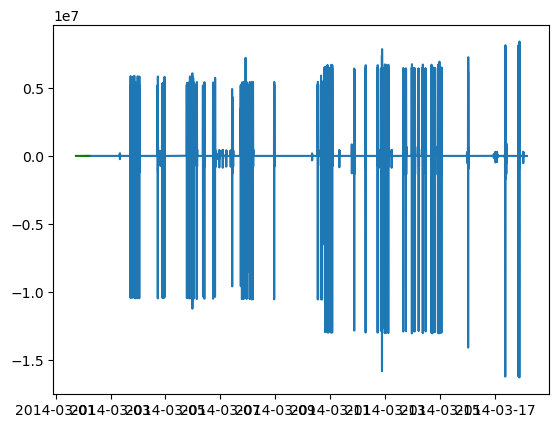

In [52]:
plt.plot(test)
plt.plot(prediction,color='green')

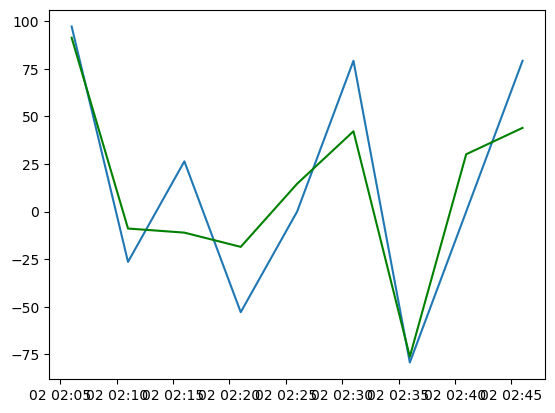

In [53]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [54]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ 9.72000000e+01, -2.64000000e+01,  2.64000000e+01, -5.28000000e+01,
       -1.42108547e-14,  7.92000000e+01, -7.92000000e+01, -1.42108547e-14,
        7.92000000e+01, -1.05600000e+02,  7.92000000e+01, -5.28000000e+01,
        8.88000000e+01, -9.84000000e+01,  9.60000000e+00,  9.72000000e+01,
       -1.41600000e+02,  9.72000000e+01, -2.64000000e+01,  1.80000000e+01,
       -3.60000000e+01, -8.40000000e+00,  9.72000000e+01, -1.23600000e+02,
        4.32000000e+01])

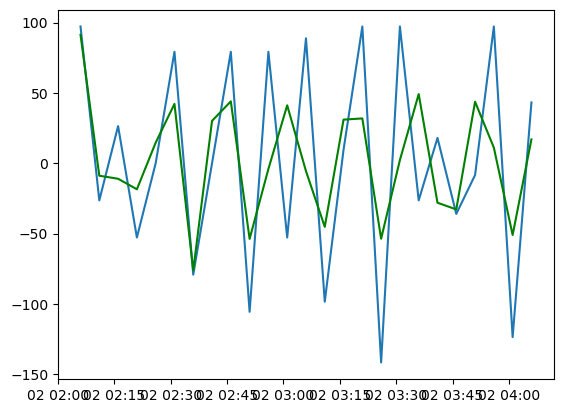

In [55]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [56]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 3290.177465342177,
 'mae': 48.935304129458224,
 'rmse': 57.36006856117047}

In [57]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

57.36006856117047


3290.177465342177

# Conclusion